# **Description**


For the CXPT501 final project, you will explore a large dataset that we simulated and modified based on a clinical trial (PIONEER-HF, ClinicalTrials.gov Identifier: NCT02554890).

In this study, researchers compared the effects of sacubitril/valsartan versus enalapril in stabilized acute heart failure patients with reduced ejection fraction.



##*Information included in the dataset*:

*Demographics*
*   Age
*   Sex
*   Race
*   Ethnicity

*Baseline characteristics*
*   Height (cm)
*   Weight (kg)
*   Smoking history
*   Pre-treatment NT-proBNP (pg/mL)
*   Pre-treatment BNP (pg/mL)

*Disease characteristics*
*   Prior use of ACEi/ARB
*   Left ventricular ejection fraction (%)
*   Chronic renal insufficiency

*Intervention*
*   Sacubitril/valsartan
*   Enalapril

*Efficacy outcome*
*   Week 4 NT-proBNP (pg/mL)
*   Week 8 NT-proBNP (pg/mL)

*Safety outcome*
*   Symptomatic hypotension
*   Hyperkalemia
*   Angioedema
*   Death

# **Instructions**

## **Data import (6 points)**

**Import the Python libraries you decide to use here, e.g. Pandas (2 points)**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Download/load your individual dataset (.csv file) (2 points)**

We have prepared a dataset for each of you, labeled by name. Please download or directly import your corresponding data file from https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23. Each dataset contains data for 1 million patients, one per row.

For directly importing your file from GitHub to your Colab notebook, click on your assigned file then right-click the Download button. From there, a drop-down menu like below should appear. Select the option that copies the direct link address to your clipboard, then paste it into your notebook.

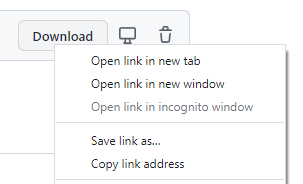

**The drop-down menu shown in Google Chrome.** If you use this web browser, click "Copy link address".

In [2]:
df = pd.read_csv("https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23/raw/main/Oguz_Kaan_Kum.csv")

**Display the dataset (2 points)**

In [3]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [4]:
df.head()

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,53.0,Female,Native American,Hispanic or Latino,187.0,66.0,former,5917.691,4420.515,3302.125,1327.162,Yes,28.276,No,Enalapril,Yes,No,No
1,69.0,Female,Asian,Hispanic or Latino,158.0,109.0,former,6484.218,4843.711,3618.252,1607.847,Yes,46.363,Yes,Enalapril,No,No,No
2,47.0,Male,Unknown,Hispanic or Latino,156.0,62.0,never,6867.587,5130.087,3832.175,1366.437,No,26.379,Yes,Enalapril,No,Yes,No
3,57.0,Female,Unknown,Hispanic or Latino,193.0,106.0,former,5700.089,4257.966,3180.701,1316.822,Yes,32.022,Yes,Enalapril,No,Yes,No
4,64.0,Male,Native American,Not Hispanic or Latino,212.0,72.0,never,6208.892,4638.042,3464.617,1702.307,No,NaN,No,Enalapril,Yes,No,No


## **Data cleaning (16 points)**


In [5]:
#Creating a backup file before any edit.
df_backup = df.copy()

**Please remove all rows that have any NaN value in them (2 points)**

You can confirm that you've done this properly by using:
```
DataFrame.isnull().sum()
```

In [6]:
#Rows with at least one NaN value are deleted.
df2 = df.dropna(axis=0, how="any")

In [7]:
#This confirms that cleaning was successful.
df2.isnull().sum()

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64

In [8]:
#11 rows were deleted in previous cleaning.
print(len(df.index))
print(len(df2.index))

1000
989


**Based on the study's inclusion criteria, please filter out patients who don't meet the following criteria. Store the remaining patient data in a new DataFrame. (8 points)**

*Inclusion criteria*
*   age >= 18
*   pre-treatment NT-proBNP >= 1600 pg/mL
*   pre-treatment BNP >= 400 pg/mL
*   left ventricular ejection fraction <= 40%

You can confirm how many patient entries remain by using:
```
len(DataFrame)
```



In [9]:
#Dataframe is edited based on the criteria.
df3 = df2.loc[(df.Age >= 18) & (df["Pre-treatment NT-proBNP (pg/mL)"] >= 1600) & (df["Pre-treatment BNP (pg/mL)"] >= 400) & (df["Left ventricular ejection fraction (%)"] <= 40)]

In [10]:
len(df3)

870

**Add a "BMI (kg/m^2)" column to the dataframe by calculating body mass index based on weight and height provided** `BMI = weight(kg)/(height(m)**2)` **where** '`**`' **is  the exponent operator in Python. Be wary of units. (6 points)**

In [11]:
#BMI column created based on BMI calculation.
df3["BMI (kg/m^2)"] = df3["Weight (kg)"]/((df3["Height (cm)"]/100)**2)

<ipython-input-11-83c277a1bb73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BMI (kg/m^2)"] = df3["Weight (kg)"]/((df3["Height (cm)"]/100)**2)


In [12]:
df3.head()

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2)
0,53.0,Female,Native American,Hispanic or Latino,187.0,66.0,former,5917.691,4420.515,3302.125,1327.162,Yes,28.276,No,Enalapril,Yes,No,No,18.873860
2,47.0,Male,Unknown,Hispanic or Latino,156.0,62.0,never,6867.587,5130.087,3832.175,1366.437,No,26.379,Yes,Enalapril,No,Yes,No,25.476660
3,57.0,Female,Unknown,Hispanic or Latino,193.0,106.0,former,5700.089,4257.966,3180.701,1316.822,Yes,32.022,Yes,Enalapril,No,Yes,No,28.457140
5,28.0,Female,Pacific Islander,Not Hispanic or Latino,182.0,42.0,former,5289.037,3950.911,2951.331,1341.364,No,27.163,Yes,Enalapril,No,No,No,12.679628
6,25.0,Female,Pacific Islander,Hispanic or Latino,169.0,87.0,current,6827.978,5100.500,3810.073,1304.523,Yes,29.300,Yes,Enalapril,No,No,No,30.461118


In [13]:
df4 = df3.copy()

## **Data visualization (64 points)**

###**Explore the baseline characteristics among sacubitril/valsartan and enalapril groups (14 points)**

**Categorical Data**
*   Based on your judgement, use one or more of the most appropriate plot types to visualize some aspect of the categorical data. Intervention type must be distinguished by hue.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.



In [14]:
df4["Week4 Reduction in NT-proBNP (%)"] = (100 * (df4["Pre-treatment NT-proBNP (pg/mL)"] - df4["Week 4 NT-proBNP (pg/mL)"]))/df4["Pre-treatment NT-proBNP (pg/mL)"]

In [15]:
df4.head()

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2),Week4 Reduction in NT-proBNP (%)
0,53.0,Female,Native American,Hispanic or Latino,187.0,66.0,former,5917.691,4420.515,3302.125,1327.162,Yes,28.276,No,Enalapril,Yes,No,No,18.873860,25.300003
2,47.0,Male,Unknown,Hispanic or Latino,156.0,62.0,never,6867.587,5130.087,3832.175,1366.437,No,26.379,Yes,Enalapril,No,Yes,No,25.476660,25.300007
3,57.0,Female,Unknown,Hispanic or Latino,193.0,106.0,former,5700.089,4257.966,3180.701,1316.822,Yes,32.022,Yes,Enalapril,No,Yes,No,28.457140,25.300008
5,28.0,Female,Pacific Islander,Not Hispanic or Latino,182.0,42.0,former,5289.037,3950.911,2951.331,1341.364,No,27.163,Yes,Enalapril,No,No,No,12.679628,25.299993
6,25.0,Female,Pacific Islander,Hispanic or Latino,169.0,87.0,current,6827.978,5100.500,3810.073,1304.523,Yes,29.300,Yes,Enalapril,No,No,No,30.461118,25.299994


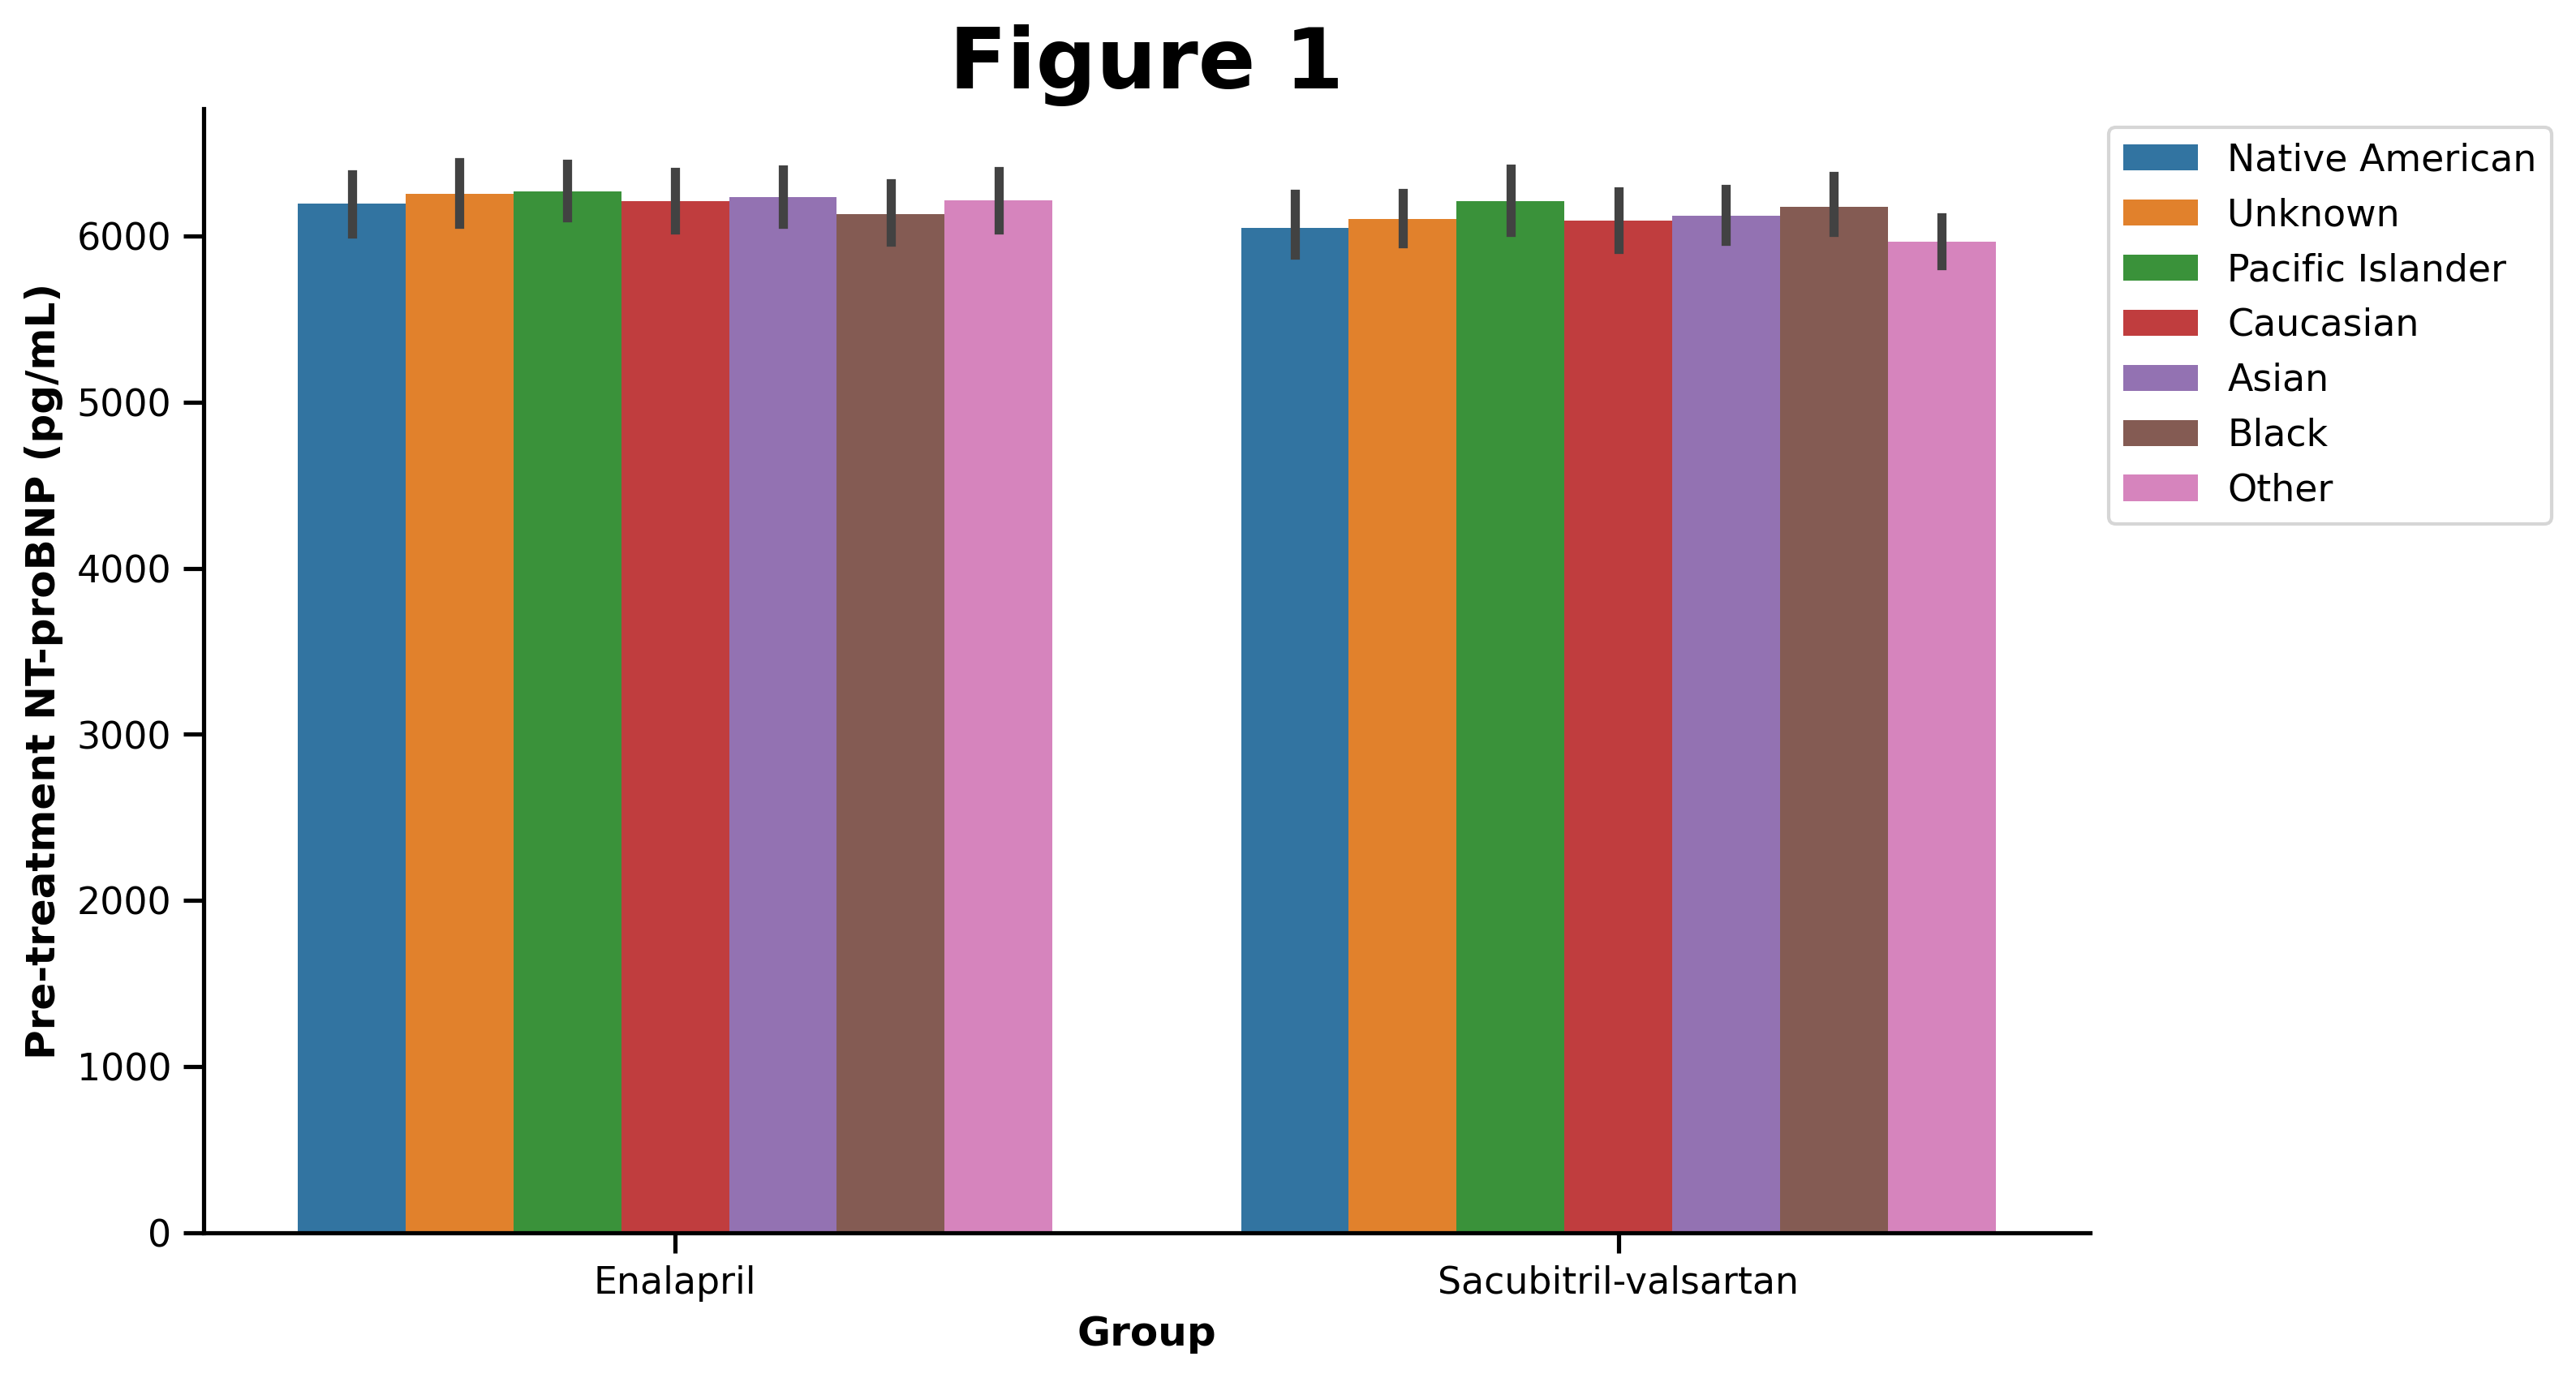

In [16]:
#Design
plt.figure(figsize = (10, 6),dpi =300)
sns.set_context("notebook")
#Data
graph = sns.barplot(data = df4, x= "Group", y="Pre-treatment NT-proBNP (pg/mL)", hue="Race")
#Axis
graph.set_xlabel("Group", weight='bold')
graph.set_ylabel("Pre-treatment NT-proBNP (pg/mL)", weight='bold')
#Title
graph.set_title("Figure 1", weight='bold', fontsize=25)
#Legend
graph.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.savefig("/content/Figure1.pdf",bbox_inches='tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks (36 points)**
**Relational Data**
*   Follow the steps below to visualize NT-proBNP concentrations over time with a relational-type plot.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Subset the cleaned and filtered DataFrame into three smaller DataFrames containing the following columns (8 points):
*   Pre-treatment NT-proBNP & Intervention Group
*   Week 4 NT-proBNP & Intervention Group
*   Week 8 NT-proBNP & Intervention Group




In [17]:
df4.columns

Index(['Age', 'Sex', 'Race', 'Ethnicity', 'Height (cm)', 'Weight (kg)',
       'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)',
       'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',
       'Pre-treatment BNP (pg/mL)', 'Prior use of ACEi/ARB',
       'Left ventricular ejection fraction (%)', 'Chronic renal insufficiency',
       'Group', 'Symptomatic hypotension', 'Hyperkalemia', 'Death',
       'BMI (kg/m^2)', 'Week4 Reduction in NT-proBNP (%)'],
      dtype='object')

In [18]:
week8=df4.filter(items=["Week 8 NT-proBNP (pg/mL)","Group"])

In [19]:
week4=df4.filter(items=["Week 4 NT-proBNP (pg/mL)","Group"])

In [20]:
week0=df4.filter(items=["Pre-treatment NT-proBNP (pg/mL)","Group"])

2) Add a column to each of the three new DataFrames specifying each DataFrame's timepoint. The name of the column should be the same for each DataFrame (6 points).

In [21]:
week8["Week"] = 8

In [22]:
week4["Week"] = 4

In [23]:
week0["Week"] = 0

In [24]:
week8

,Week 8 NT-proBNP (pg/mL),Group,Week
0,3302.125,Enalapril,8
2,3832.175,Enalapril,8
3,3180.701,Enalapril,8
5,2951.331,Enalapril,8
6,3810.073,Enalapril,8
...,...,...,...
994,1642.732,Sacubitril-valsartan,8
995,1916.966,Sacubitril-valsartan,8
996,1612.029,Sacubitril-valsartan,8
997,1493.497,Sacubitril-valsartan,8


In [25]:
week4

,Week 4 NT-proBNP (pg/mL),Group,Week
0,4420.515,Enalapril,4
2,5130.087,Enalapril,4
3,4257.966,Enalapril,4
5,3950.911,Enalapril,4
6,5100.500,Enalapril,4
...,...,...,...
994,3082.049,Sacubitril-valsartan,4
995,3596.559,Sacubitril-valsartan,4
996,3024.445,Sacubitril-valsartan,4
997,2802.058,Sacubitril-valsartan,4


3) Merge all three of the new DataFrames via the most appropriate method. (6 points)

In [26]:
df5 = pd.concat ([week0,week4,week8], axis=0)
df5

,Pre-treatment NT-proBNP (pg/mL),Group,Week,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,5917.691,Enalapril,0,NaN,NaN
2,6867.587,Enalapril,0,NaN,NaN
3,5700.089,Enalapril,0,NaN,NaN
5,5289.037,Enalapril,0,NaN,NaN
6,6827.978,Enalapril,0,NaN,NaN
...,...,...,...,...,...
994,NaN,Sacubitril-valsartan,8,NaN,1642.732
995,NaN,Sacubitril-valsartan,8,NaN,1916.966
996,NaN,Sacubitril-valsartan,8,NaN,1612.029
997,NaN,Sacubitril-valsartan,8,NaN,1493.497


4 ) Fill in any NaNs in the merged DataFrame with the integer value 0. (2 points)

In [27]:
df6 = df5.fillna(value=0)
df6

,Pre-treatment NT-proBNP (pg/mL),Group,Week,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,5917.691,Enalapril,0,0.0,0.000
2,6867.587,Enalapril,0,0.0,0.000
3,5700.089,Enalapril,0,0.0,0.000
5,5289.037,Enalapril,0,0.0,0.000
6,6827.978,Enalapril,0,0.0,0.000
...,...,...,...,...,...
994,0.000,Sacubitril-valsartan,8,0.0,1642.732
995,0.000,Sacubitril-valsartan,8,0.0,1916.966
996,0.000,Sacubitril-valsartan,8,0.0,1612.029
997,0.000,Sacubitril-valsartan,8,0.0,1493.497


5) Combine all the columns containing NT-proBNP concentration data into a new, single column. (6 points)

In [28]:
df6["NT-proBNP"] = df6["Pre-treatment NT-proBNP (pg/mL)"] + df6["Week 4 NT-proBNP (pg/mL)"] + df6["Week 8 NT-proBNP (pg/mL)"]
df6

,Pre-treatment NT-proBNP (pg/mL),Group,Week,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),NT-proBNP
0,5917.691,Enalapril,0,0.0,0.000,5917.691
2,6867.587,Enalapril,0,0.0,0.000,6867.587
3,5700.089,Enalapril,0,0.0,0.000,5700.089
5,5289.037,Enalapril,0,0.0,0.000,5289.037
6,6827.978,Enalapril,0,0.0,0.000,6827.978
...,...,...,...,...,...,...
994,0.000,Sacubitril-valsartan,8,0.0,1642.732,1642.732
995,0.000,Sacubitril-valsartan,8,0.0,1916.966,1916.966
996,0.000,Sacubitril-valsartan,8,0.0,1612.029,1612.029
997,0.000,Sacubitril-valsartan,8,0.0,1493.497,1493.497


6) Use a line plot to graph NT-proBNP concentration over time, with Intervention Group seperated by hue. (8 points)

The arguements you pass to lineplot() should include:
*   `ci='sd'`
*   `err_style='bars'`
*   `marker="o"`



<ipython-input-29-4805bf7492ee>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  graph = sns.lineplot(data=df6, x="Week",y="NT-proBNP", hue = "Group",ci='sd',err_style='bars',marker="o")


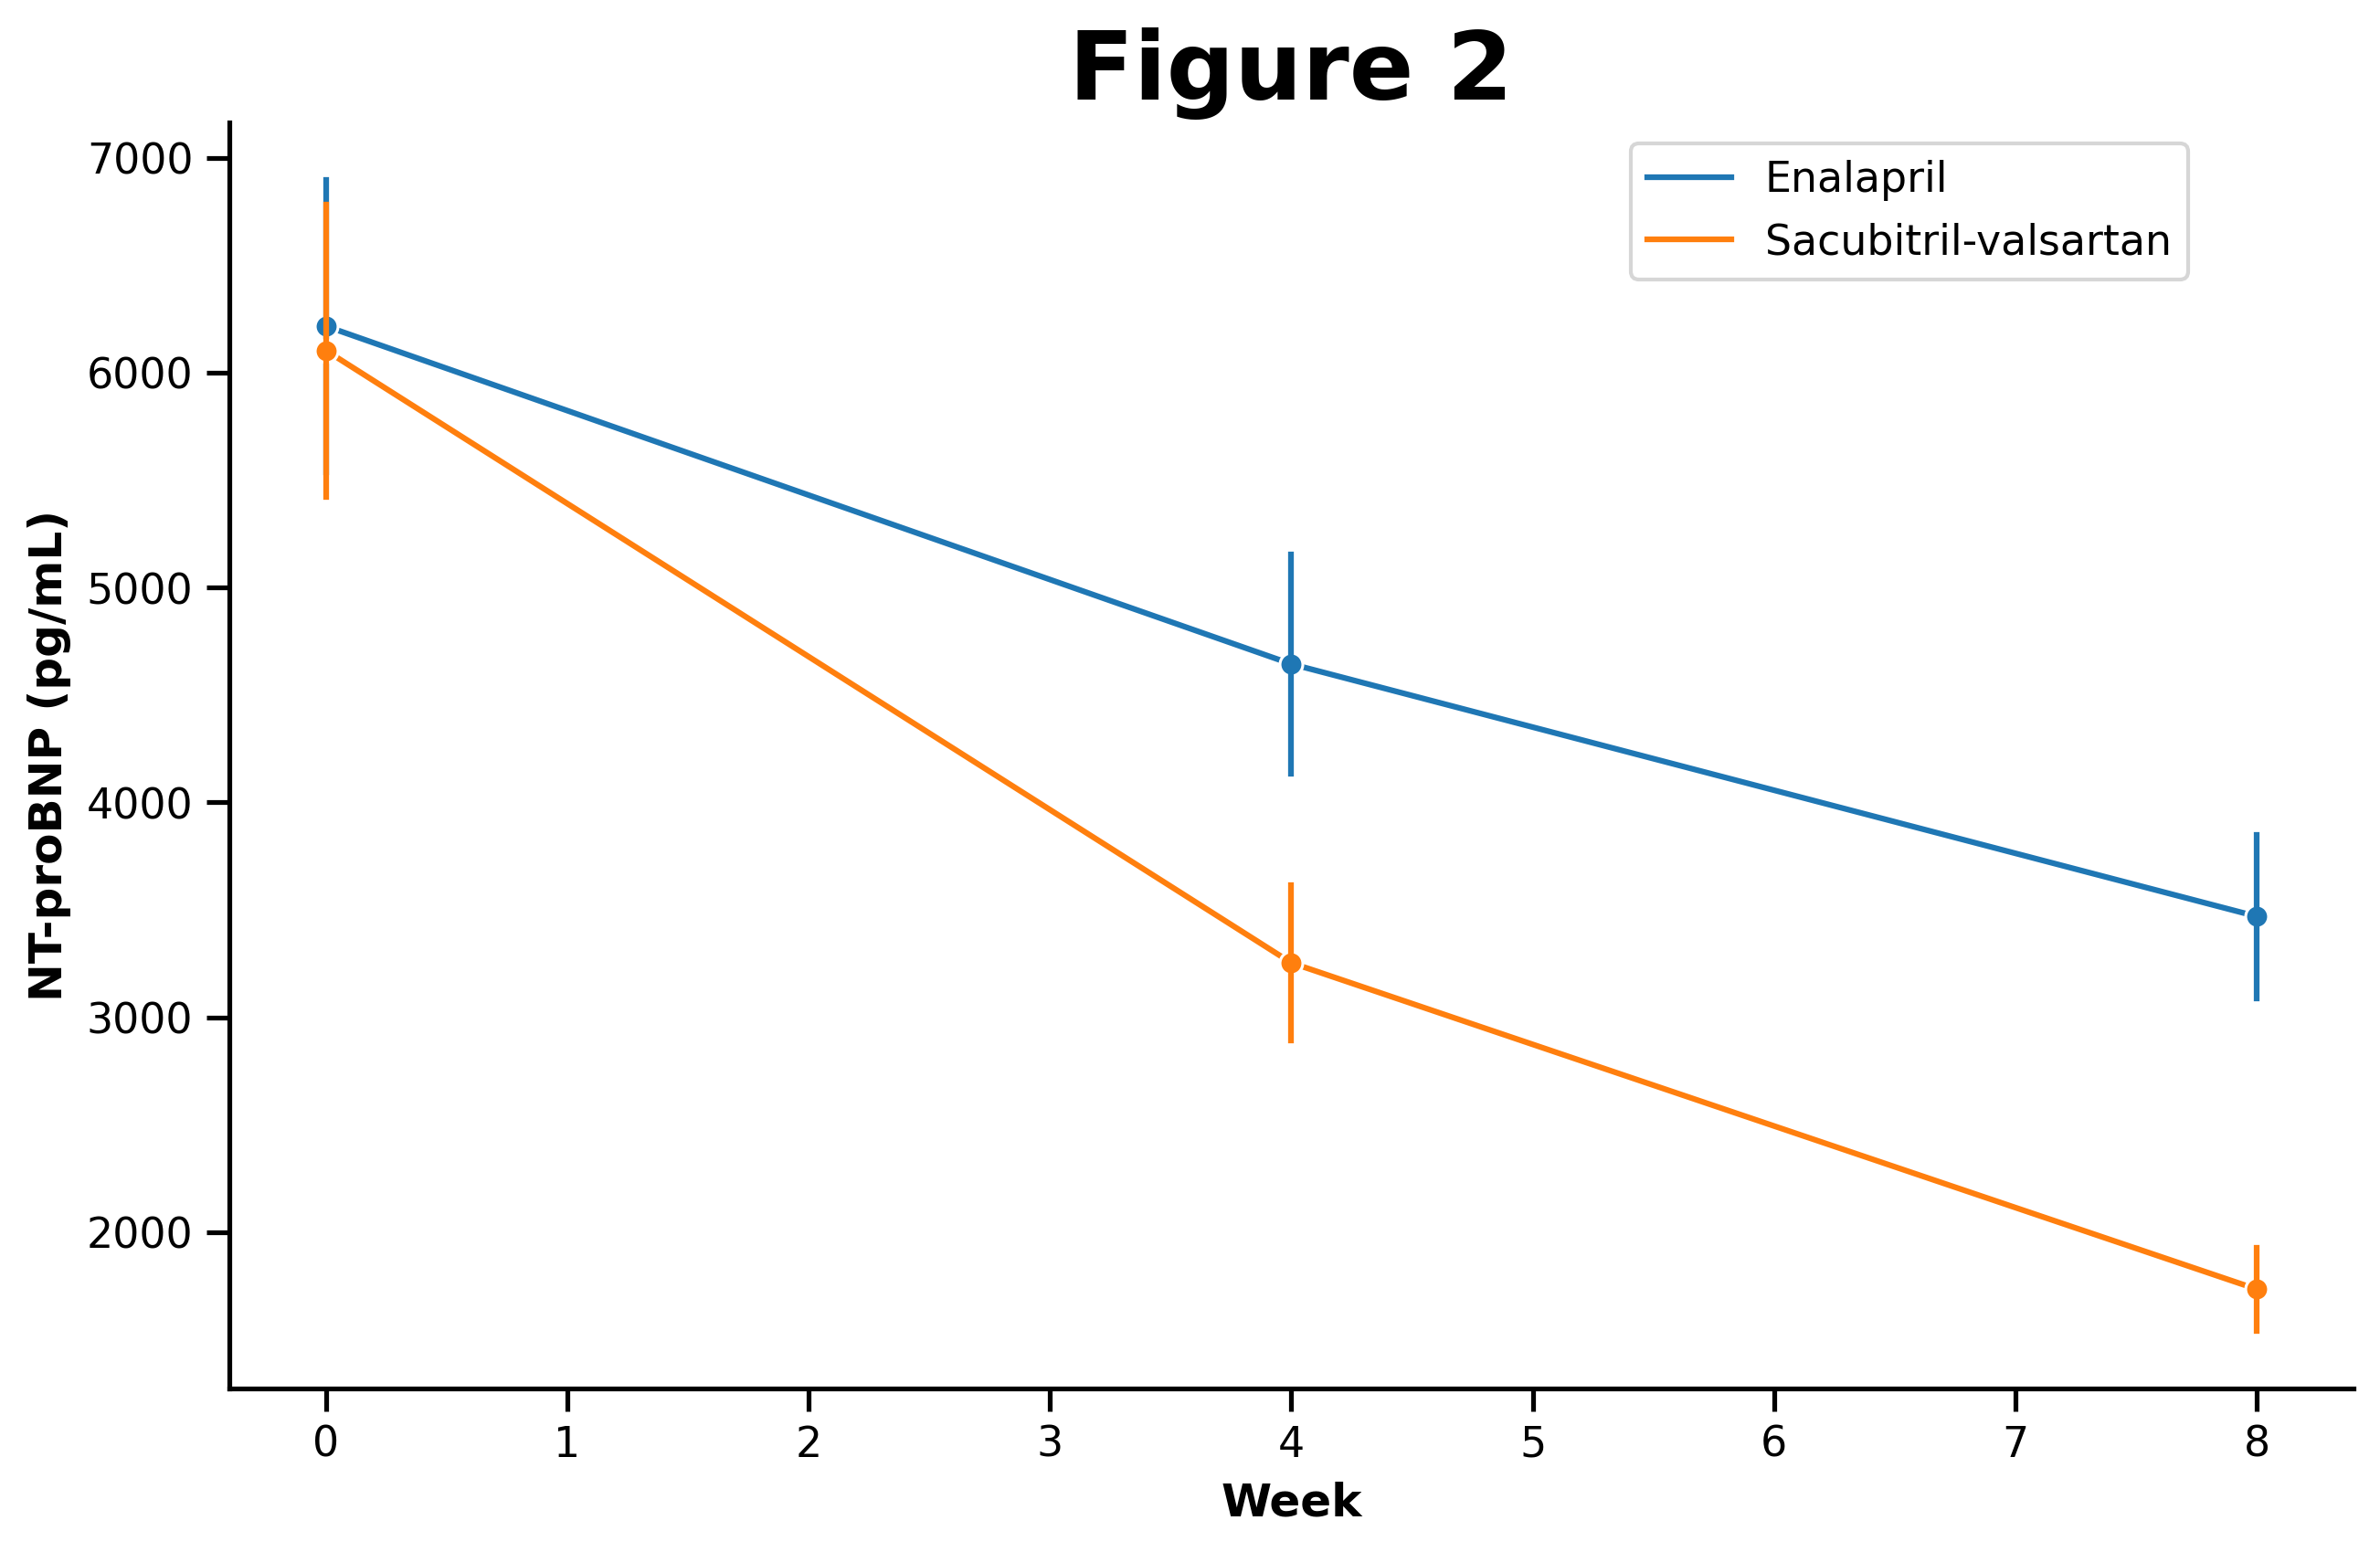

In [29]:
#Design
plt.figure(figsize = (10, 6),dpi =300)
sns.set_context("notebook")
#Data
graph = sns.lineplot(data=df6, x="Week",y="NT-proBNP", hue = "Group",ci='sd',err_style='bars',marker="o")
#Axis
graph.set_xlabel("Week", weight='bold')
graph.set_ylabel("NT-proBNP (pg/mL)", weight='bold')
#Title
graph.set_title("Figure 2", weight='bold', fontsize=25)
#Legend
graph.legend(loc='upper left', bbox_to_anchor=(0.65, 1))
sns.despine()
plt.savefig("/content/Figure2.pdf",bbox_inches='tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril for a  demographic (8 points)**

**Matrix Data**
*   Follow the steps below to produce a heatmap to visualize NT-proBNP concentration at Week 8 for some demographic of your choice. Intervention type must be an axis of the matrix data.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Contexts

* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

In [30]:
df4.head(3)

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2),Week4 Reduction in NT-proBNP (%)
0,53.0,Female,Native American,Hispanic or Latino,187.0,66.0,former,5917.691,4420.515,3302.125,1327.162,Yes,28.276,No,Enalapril,Yes,No,No,18.87386,25.300003
2,47.0,Male,Unknown,Hispanic or Latino,156.0,62.0,never,6867.587,5130.087,3832.175,1366.437,No,26.379,Yes,Enalapril,No,Yes,No,25.47666,25.300007
3,57.0,Female,Unknown,Hispanic or Latino,193.0,106.0,former,5700.089,4257.966,3180.701,1316.822,Yes,32.022,Yes,Enalapril,No,Yes,No,28.45714,25.300008


1) Convert your categorical data into matrix data. (4 points)

In [31]:
dfgrouped = df4.groupby(["Group","Age"]).mean()
dfgrouped = dfgrouped.reset_index()
dfgrouped

<ipython-input-31-ea3cdb3406d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfgrouped = df4.groupby(["Group","Age"]).mean()


,Group,Age,Height (cm),Weight (kg),Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI (kg/m^2),Week4 Reduction in NT-proBNP (%)
0,Enalapril,18.0,179.111111,65.444444,6651.117444,4968.384556,3711.383333,1625.128889,33.575444,21.370664,25.300003
1,Enalapril,19.0,187.375000,87.000000,6210.838375,4639.496125,3465.703500,1522.162625,28.629875,25.297954,25.300002
2,Enalapril,20.0,183.000000,69.857143,6056.976714,4524.561429,3379.847143,1438.827286,30.579714,21.145354,25.300003
3,Enalapril,21.0,186.000000,75.375000,5944.734875,4440.716875,3317.215500,1689.811875,30.863000,22.968327,25.300001
4,Enalapril,22.0,186.666667,71.833333,5848.464000,4368.802667,3263.495500,1581.769167,30.979333,21.951536,25.299999
...,...,...,...,...,...,...,...,...,...,...,...
119,Sacubitril-valsartan,75.0,181.538462,72.769231,5631.350923,3001.510077,1599.805000,1535.263154,30.400308,22.814833,46.699999
120,Sacubitril-valsartan,76.0,195.000000,65.400000,5923.913200,3157.445800,1682.918600,1444.925000,29.387400,17.118026,46.699999
121,Sacubitril-valsartan,77.0,179.300000,87.600000,6271.046800,3342.468000,1781.535400,1530.968400,30.823300,28.435096,46.699999
122,Sacubitril-valsartan,78.0,176.666667,90.666667,5876.146667,3131.986333,1669.348667,1615.654500,29.917500,29.417157,46.699997


In [32]:
matrixDF = dfgrouped.pivot("Group", 'Age', 'Week 8 NT-proBNP (pg/mL)')
matrixDF

<ipython-input-32-4e730051f260>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrixDF = dfgrouped.pivot("Group", 'Age', 'Week 8 NT-proBNP (pg/mL)')


Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
Group,,,,,,,,,,,,,,,,,,,,,
Enalapril,3711.383333,3465.7035,3379.847143,3317.215500,3263.4955,3455.052125,3260.169571,3590.648625,3705.200167,3605.735000,...,3415.375375,3698.246364,3881.35450,3194.53175,3580.103667,3378.135909,3595.256889,3587.106857,3575.363000,3453.079
Sacubitril-valsartan,1613.531000,1599.0335,1727.522083,1787.048857,1711.5652,1717.641500,1780.338750,1631.674100,1797.187750,1802.013846,...,1828.878500,1737.877200,1660.22225,1710.25025,1776.837800,1599.805000,1682.918600,1781.535400,1669.348667,1723.268


2) Plot a heatmap from your matrix data. It is okay if it does not look very complex. (4 points)

<Axes: xlabel='Age', ylabel='Group'>

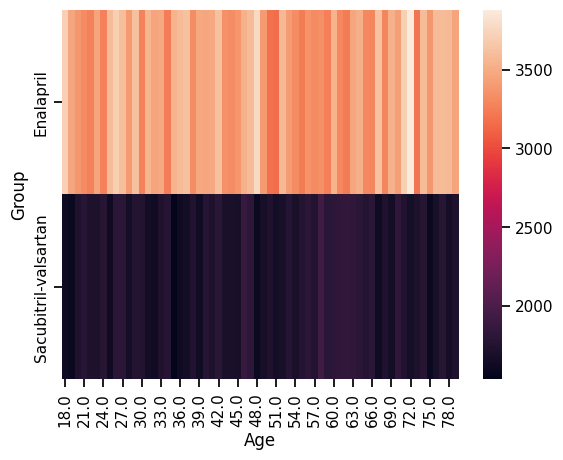

In [33]:
sns.heatmap(data=matrixDF)

## **Statistical analysis (20 points)**

**Explore the safety of sacubitril/valsartan and enalapril in this stabilized acute heart failure patient population**

Please provide the following statistical measures for various characteristics, including BMI, and group the results by the intervention type (sacubitril/valsartan and enalapril):

**For Sacubitril/Valsartan Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.

**For Enalapril Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.  (4 points)

In [34]:
GroupA= df4.loc[df4.Group == "Sacubitril-valsartan"]
GroupB= df4.loc[df4.Group == "Enalapril"]

In [35]:
GroupA.head(1)

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2),Week4 Reduction in NT-proBNP (%)
500,22.0,Female,Other,Hispanic or Latino,157.0,106.0,current,5503.78,2933.515,1563.563,1322.683,Yes,34.56,No,Sacubitril-valsartan,No,No,No,43.003773,46.699995


In [36]:
GroupA.groupby("Group").aggregate({"Age" : ["mean","std","median"],
                                "Height (cm)" : ["mean","std","median"],
                                "Weight (kg)" : ["mean","std","median"],
                                "Pre-treatment NT-proBNP (pg/mL)" : ["mean","std","median"],
                                "Week 4 NT-proBNP (pg/mL)" : ["mean","std","median"],
                                "Week 8 NT-proBNP (pg/mL)" : ["mean","std","median"],
                                "Pre-treatment BNP (pg/mL)" : ["mean","std","median"],
                                "Left ventricular ejection fraction (%)" : ["mean","std","median"],
                                "BMI (kg/m^2)" : ["mean","std","median"]}).T

Group                                          Sacubitril-valsartan
Age                                    mean               49.270642
                                       std                18.153754
                                       median             50.000000
Height (cm)                            mean              180.963303
                                       std                17.338643
                                       median            181.000000
Weight (kg)                            mean               80.027523
                                       std                23.326551
                                       median             81.000000
Pre-treatment NT-proBNP (pg/mL)        mean             6104.689193
                                       std               680.157698
                                       median           5933.375500
Week 4 NT-proBNP (pg/mL)               mean             3253.799353
                                       std               362.524036
                                       median           3162.489000
Week 8 NT-proBNP (pg/mL)               mean             1734.275064
                                       std               193.225305
                                       median           1685.606500
Pre-treatment BNP (pg/mL)              mean             1536.236993
                                       std               177.313373
                                       median           1502.433000
Left ventricular ejection fraction (%) mean               30.653080
                                       std                 3.946174
                                       median             30.207000
BMI (kg/m^2)                           mean               25.170394
                                       std                 9.057130
                                       median             23.959341

In [37]:
GroupB.groupby("Group").aggregate({"Age" : ["mean","std","median"],
                                "Height (cm)" : ["mean","std","median"],
                                "Weight (kg)" : ["mean","std","median"],
                                "Pre-treatment NT-proBNP (pg/mL)" : ["mean","std","median"],
                                "Week 4 NT-proBNP (pg/mL)" : ["mean","std","median"],
                                "Week 8 NT-proBNP (pg/mL)" : ["mean","std","median"],
                                "Pre-treatment BNP (pg/mL)" : ["mean","std","median"],
                                "Left ventricular ejection fraction (%)" : ["mean","std","median"],
                                "BMI (kg/m^2)" : ["mean","std","median"]}).T

Group                                            Enalapril
Age                                    mean      48.504608
                                       std       18.066882
                                       median    47.500000
Height (cm)                            mean     183.813364
                                       std       17.181404
                                       median   184.000000
Weight (kg)                            mean      80.785714
                                       std       22.940282
                                       median    82.000000
Pre-treatment NT-proBNP (pg/mL)        mean    6217.748442
                                       std      681.312142
                                       median  6081.595500
Week 4 NT-proBNP (pg/mL)               mean    4644.658097
                                       std      508.940159
                                       median  4542.951500
Week 8 NT-proBNP (pg/mL)               mean    3469.559597
                                       std      380.178306
                                       median  3393.584500
Pre-treatment BNP (pg/mL)              mean    1536.314152
                                       std      172.932032
                                       median  1508.225000
Left ventricular ejection fraction (%) mean      31.066878
                                       std        3.832334
                                       median    30.733000
BMI (kg/m^2)                           mean      24.593486
                                       std        8.736221
                                       median    23.340460

In [38]:
#Sacubitril-valsartan group is filtered.
SGroup = df4.loc[df4["Group"]=="Sacubitril-valsartan"]
SGroup.head(1)

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2),Week4 Reduction in NT-proBNP (%)
500,22.0,Female,Other,Hispanic or Latino,157.0,106.0,current,5503.78,2933.515,1563.563,1322.683,Yes,34.56,No,Sacubitril-valsartan,No,No,No,43.003773,46.699995


In [39]:
#Enalapril group is filtered.
EGroup = df4.loc[df4["Group"]=="Enalapril"]
EGroup.head(1)

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI (kg/m^2),Week4 Reduction in NT-proBNP (%)
0,53.0,Female,Native American,Hispanic or Latino,187.0,66.0,former,5917.691,4420.515,3302.125,1327.162,Yes,28.276,No,Enalapril,Yes,No,No,18.87386,25.300003


What statistical test should be employed to analyze the effectiveness of the new heart failure medication formulations developed by two pharmaceutical companies, sacubitril and enalapril, with respect to their claims of reducing NT-proBNP levels? The claims state that sacubitril reduces NT-proBNP levels by an average of 3000 within 4 weeks and 2000 within 8 weeks, while enalapril reduces NT-proBNP levels by an average of 2500 within 4 weeks and 1500 within 8 weeks. A clinical trial was conducted using samples from both companies, and the objective is to determine which formulation is more effective.

Clearly state your hypotheses for the combinations of analyses and do the significance test accordingly:

1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)
   

In [40]:
  import numpy as np
  import scipy.stats as stats

In [41]:
"""
1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels?

Paired T-test:
H0: There is no significant difference between pre-treatment and Week 4 NT-proBNP levels
H1: There is a significant difference between pre-treatment and Week 4 NT-proBNP levels

p value is 0 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between pre-treatment and Week 4 NT-proBNP levels in the the sacubitril group.
"""
stats.ttest_rel(SGroup['Week 4 NT-proBNP (pg/mL)'],SGroup['Pre-treatment NT-proBNP (pg/mL)'])


TtestResult(statistic=-187.41189831166912, pvalue=0.0, df=435)

In [42]:
"""
2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels?

Paired T-test:
H0: There is no significant difference between pre-treatment and Week 8 NT-proBNP levels
H1: There is a significant difference between pre-treatment and Week 8 NT-proBNP levels

p value is 0 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between pre-treatment and Week 8 NT-proBNP levels in the the sacubitril group.
"""
stats.ttest_rel(SGroup['Week 8 NT-proBNP (pg/mL)'],SGroup['Pre-treatment NT-proBNP (pg/mL)'])

TtestResult(statistic=-187.41190237153813, pvalue=0.0, df=435)

In [43]:
"""
3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels?

Paired T-test:
H0: There is no significant difference between pre-treatment and Week 4 NT-proBNP levels
H1: There is a significant difference between pre-treatment and Week 4 NT-proBNP levels

p value is 0 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between pre-treatment and Week 4 NT-proBNP levels in the the enalapril group.
"""
stats.ttest_rel(EGroup['Week 4 NT-proBNP (pg/mL)'],EGroup['Pre-treatment NT-proBNP (pg/mL)'])

TtestResult(statistic=-190.12177176551728, pvalue=0.0, df=433)

In [44]:
"""
4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels?

Paired T-test:
H0: There is no significant difference between pre-treatment and Week 8 NT-proBNP levels
H1: There is a significant difference between pre-treatment and Week 8 NT-proBNP levels

p value is 0 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between pre-treatment and Week 8 NT-proBNP levels in the the enalapril group.
"""
stats.ttest_rel(EGroup['Week 8 NT-proBNP (pg/mL)'],EGroup['Pre-treatment NT-proBNP (pg/mL)'])

TtestResult(statistic=-190.121783830046, pvalue=0.0, df=433)

In [45]:
"""
5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)?

Groups are independent, so checking variances: Levene Test
H0: the variance among groups is equal
H1: The variance among different groups is not equal
p value is 5x10^-11 which means we can reject the H0 hypothesis.

Due to unequal variance, "Welch's t-test" will be used.
H0: There is no significant difference between two groups at week 4.
H1: There is a significant difference between two groups at week 4.

p value is 7x10^-227 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between two groups in NT-proBNP levels at Week 4.

"""

stats.levene(SGroup['Week 4 NT-proBNP (pg/mL)'],EGroup['Week 4 NT-proBNP (pg/mL)'])


LeveneResult(statistic=44.25251848597011, pvalue=5.1046939773145166e-11)

In [46]:
stats.ttest_ind(SGroup['Week 4 NT-proBNP (pg/mL)'],EGroup['Week 4 NT-proBNP (pg/mL)'], equal_var=False)

TtestResult(statistic=-46.40707416381472, pvalue=7.372571078014968e-227, df=782.2189005706318)

In [47]:
"""
6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)?
Groups are independent, so checking variances: Levene Test
H0: the variance among groups is equal
H1: The variance among different groups is not equal
p value is 1x10^-31 which means we can reject the H0 hypothesis.

Due to unequal variance, "Welch's t-test" will be used.
H0: There is no significant difference between two groups at week 8.
H1: There is a significant difference between two groups at week 8.

p value is 0 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between two groups in NT-proBNP levels at Week 8.

"""

stats.levene(SGroup['Week 8 NT-proBNP (pg/mL)'],EGroup['Week 8 NT-proBNP (pg/mL)'])

LeveneResult(statistic=147.99692664802953, pvalue=1.4936763687736023e-31)

In [48]:
stats.ttest_ind(SGroup['Week 8 NT-proBNP (pg/mL)'],EGroup['Week 8 NT-proBNP (pg/mL)'], equal_var=False)

TtestResult(statistic=-84.8081798237252, pvalue=0.0, df=642.0499612980625)

In [49]:
"""
7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)?

Groups are independent, so checking variances: Levene Test
H0: the variance among groups is equal
H1: The variance among different groups is not equal
p value is 1.69x10^-6 which means we can reject the H0 hypothesis.

Due to unequal variance, "Welch's t-test" will be used.
H0: There is no significant difference between two groups at week 4.
H1: There is a significant difference between two groups at week 4.

p value is 8x10^-75 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between two groups, among participants aged 60 or older, in NT-proBNP levels at Week 4.
"""


'\n7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)?\n\nGroups are independent, so checking variances: Levene Test\nH0: the variance among groups is equal\nH1: The variance among different groups is not equal\np value is 1.69x10^-6 which means we can reject the H0 hypothesis.\n\nDue to unequal variance, "Welch\'s t-test" will be used.\nH0: There is no significant difference between two groups at week 4.\nH1: There is a significant difference between two groups at week 4.\n\np value is 8x10^-75 which means we can reject the H0 hypothesis.\n>Result: There is a significant difference between two groups, among participants aged 60 or older, in NT-proBNP levels at Week 4.\n'

In [50]:
over60S = SGroup.loc[SGroup["Age"]>=60]
over60E = EGroup.loc[EGroup["Age"]>=60]

In [51]:
stats.levene(over60S['Week 4 NT-proBNP (pg/mL)'],over60E['Week 4 NT-proBNP (pg/mL)'])

LeveneResult(statistic=23.875400225197836, pvalue=1.6890567106737738e-06)

In [52]:
stats.ttest_ind(over60S['Week 4 NT-proBNP (pg/mL)'],over60E['Week 4 NT-proBNP (pg/mL)'], equal_var=False)

TtestResult(statistic=-26.922957530237206, pvalue=8.87858598047776e-75, df=242.26445799028798)

In [53]:
"""
8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)?

Groups are independent, so checking variances: Levene Test
H0: the variance among groups is equal
H1: The variance among different groups is not equal
p value is 7.66x10^-15 which means we can reject the H0 hypothesis.

Due to unequal variance, "Welch's t-test" will be used.
H0: There is no significant difference between two groups at week 8.
H1: There is a significant difference between two groups at week 8.

p value is 3x10^-111 which means we can reject the H0 hypothesis.
>Result: There is a significant difference between two groups, among participants aged 60 or older, in NT-proBNP levels at Week 8.
"""

'\n8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)?\n\nGroups are independent, so checking variances: Levene Test\nH0: the variance among groups is equal\nH1: The variance among different groups is not equal\np value is 7.66x10^-15 which means we can reject the H0 hypothesis.\n\nDue to unequal variance, "Welch\'s t-test" will be used.\nH0: There is no significant difference between two groups at week 8.\nH1: There is a significant difference between two groups at week 8.\n\np value is 3x10^-111 which means we can reject the H0 hypothesis.\n>Result: There is a significant difference between two groups, among participants aged 60 or older, in NT-proBNP levels at Week 8.\n'

In [54]:
stats.levene(over60S['Week 8 NT-proBNP (pg/mL)'],over60E['Week 8 NT-proBNP (pg/mL)'])

LeveneResult(statistic=67.17694627751635, pvalue=7.660179362709046e-15)

In [55]:
stats.ttest_ind(over60S['Week 8 NT-proBNP (pg/mL)'],over60E['Week 8 NT-proBNP (pg/mL)'], equal_var=False)

TtestResult(statistic=-48.11375201869365, pvalue=3.195989223150615e-111, df=198.05112229459934)

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

>Yes, in both formulation, proBNP levels are reduced and statistically significant differences were observed through statistical tests which were employed in previous questions.

In [56]:
%%bash
rm -r /content/sample_data

In [58]:
%%bash
mkdir /content/Chapter1

In [59]:
%%bash
mkdir /content/Chapter1/startingData
mkdir /content/Chapter1/code
mkdir /content/Chapter1/results
mkdir /content/Chapter1/figures

In [60]:
%%bash
cat > /content/README.md

In [61]:
%%bash
cat > /content/Chapter1/README.md

In [62]:
%%bash
cat > /content/Chapter1/startingData/README.md

In [63]:
%%bash
cat > /content/Chapter1/code/README.md

In [64]:
%%bash
cat > /content/Chapter1/results/README.md

In [65]:
%%bash
cat > /content/Chapter1/figures/README.md

In [75]:
df.to_csv('data.csv', index=False)

In [76]:
%%bash
mv data.csv /content/Chapter1/startingData/

In [77]:
%%bash
mv Figure1.pdf /content/Chapter1/figures/
mv Figure2.pdf /content/Chapter1/figures/